In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
4,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lin_reg.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(lin_reg.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6918429274842777
Coefficient of determination R^2 <-- on test set: 0.7080163062169648


In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg,x,y,cv=5)
score

array([0.62686045, 0.62360234, 0.5831835 , 0.58695029, 0.59733032])

In [12]:
score.mean()

0.603585379510293

In [14]:
lin_reg.coef_

array([  4.83407198,   1.54019061,  -8.41391913,   1.48649663,
        -0.6733769 , -82.67363728,  -1.36726988,  -0.4960548 ])

In [15]:
lin_reg.intercept_

-1191.6819239186277

##### Model Evaluation

In [16]:
coeff_df = pd.DataFrame(lin_reg.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,4.834072
TM,1.540191
Tm,-8.413919
SLP,1.486497
H,-0.673377
VV,-82.673637
V,-1.367270
VM,-0.496055


In [18]:
line_pred = lin_reg.predict(X_test)

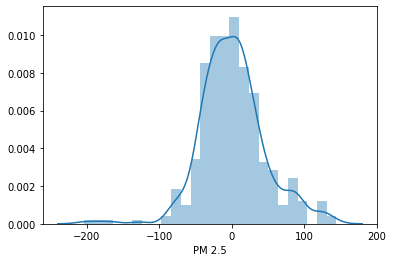

In [21]:
sns.distplot(y_test-line_pred)

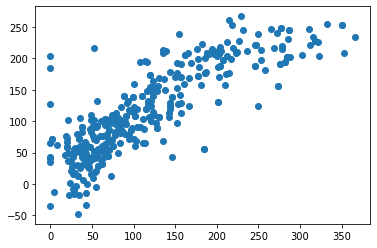

In [24]:
plt.scatter(y_test,pred)

##### Regression Evaluation Metrics

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 33.40331451231845
MSE: 2050.13085038968
RMSE 45.278370668451394


In [29]:
import pickle
#open a file to store values in 
file = open('regression_model.pkl', 'wb')

#write data into the file
pickle.dump(lin_reg, file)